In [11]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
import os
from pymer4.simulate import easy_multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline
base_dir = '/Users/Esh/Documents/Dartmouth/Cosan/Projects/Flatland_Fallacy/'

# Create Prospect theory figure

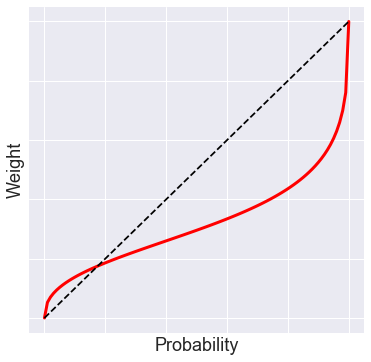

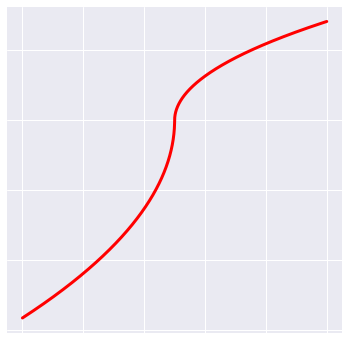

In [83]:
def prospect_value(x, a=.88, b=.88, l=2.25):
    if x >= 0:
        return x**a
    else:
        return -l*(-x)**b

def prospect_weight(p, delta=.42,gamma=.44):
    return (delta*p**gamma)/(delta*p**gamma + (1-p)**gamma)


p = [x for x in np.arange(0,1.01,.01)]

plt.figure(figsize=(6,6))
plt.plot([prospect_weight(p=pp) for pp in p],linewidth=3,color='r')
plt.plot(p,linestyle='--',color='k')
plt.ylabel('Weight', fontsize=18)
plt.xlabel('Probability',fontsize=18)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    labelleft='off')
plt.savefig(os.path.join(base_dir,'Figures','ProspectTheory_Weight.pdf'))

x = [x for x in range(-5000,5000,1)]
plt.figure(figsize=(6,6))
plt.plot([prospect_value(x=xx,a=.5,b=.5,l=2) for xx in x],linewidth=3,color='r')
# plt.plot(p,linestyle='--',color='k')
plt.ylabel('', fontsize=18)
plt.xlabel('',fontsize=18)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    labelleft='off')
plt.savefig(os.path.join(base_dir,'Figures','ProspectTheory_Value.pdf'))

# Simulate Dimensionality Estimation

In [9]:
n_sims = 10
n_samples = 1000
n_dims = 20
r = .25
#simulated = pd.DataFrame(np.random.multivariate_normal(mu_vec, cov_mat, 10000))
#simulated = pd.DataFrame(easy_multivariate_normal(10000,n_dims,np.random.uniform(-r,r,int(n_dims*(n_dims-1)/2))))
simulated = pd.DataFrame(easy_multivariate_normal(10000,n_dims,np.eye(n_dims)))
n_components=pd.DataFrame()

all_out = []
for i in range(n_sims):
    out = {}
    for n in range(n_dims,n_samples,20):
    
        mu_vec = np.zeros(n_dims)
        cov_mat = np.eye(n_dims)
        sim = simulated.loc[np.random.choice(np.arange(simulated.shape[0]),n),:]
        pca = PCA()
        _=pca.fit(sim)
        out[n] = pca.explained_variance_ratio_*100
    
    out = pd.DataFrame(out).T
    all_out.append(out)
    
concat = pd.concat(all_out)
new_out = concat.groupby(concat.index).mean()

Text(0.5,0,'')

Text(0.5,0,'')

Text(0.5,0,'')

Text(0.5,0.92,'')

(0, 20)

(array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
 <a list of 10 Text xticklabel objects>)

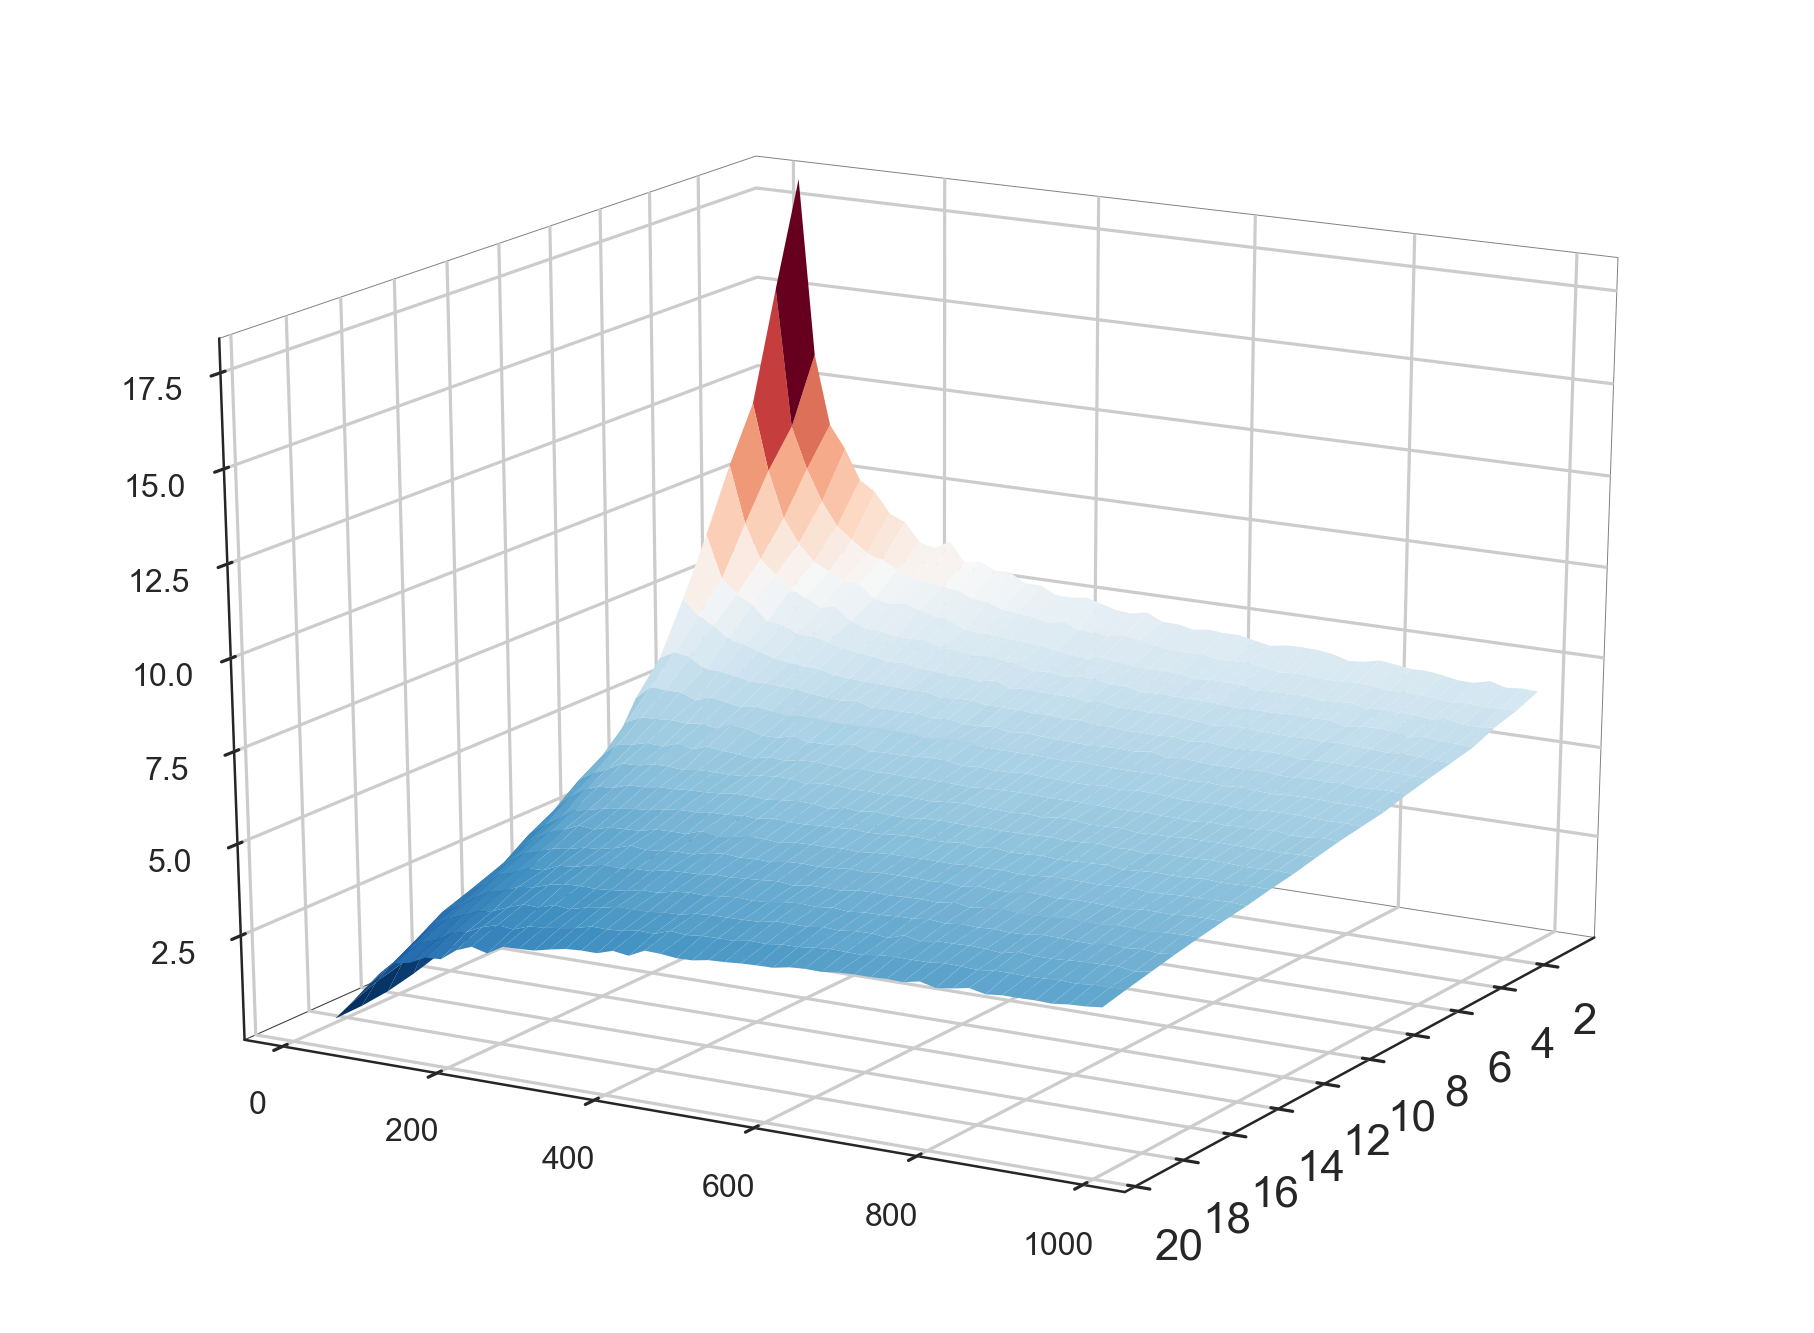

In [12]:
# Create Plot
sns.set_context('poster');
sns.set_style('white')
X,Y = np.meshgrid(np.arange(0,n_dims,1),np.arange(n_dims,n_samples, 20))
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X=X,Y=Y,Z=new_out.values,cmap='RdBu_r')
# ax.plot_wireframe(X=X,Y=Y,Z=out.values)
ax.set_xlabel('', fontsize=18)
#ax.set(yticklabels=[1000,800,600,400,200,0])
ax.set_ylabel('', fontsize=18)
ax.set_zlabel('', fontsize=18)
ax.set_title('', fontsize=18)
ax.view_init(20, 30);
ax.set_xlim(0,20);
ax.xaxis.set_ticks(np.arange(2,22,2))
ax.xaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
plt.xticks(fontsize=22)
plt.savefig(os.path.join(base_dir,'figures','3D_ExplainedVariance_v2.pdf'),transparent=True)